In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# importing some essential libraries


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

#Load the data and preprocess data

In [8]:
train_path="/content/drive/MyDrive/MNIST/train"
test_path = "/content/drive/MyDrive/MNIST/test"

In [9]:
train_path

'/content/drive/MyDrive/MNIST/train'

#Preparing Data

In [10]:
import tensorflow.keras.preprocessing.image

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

In [13]:
image_gen.flow_from_directory(train_path)

Found 17000 images belonging to 10 classes.


In [14]:
image_gen.flow_from_directory(test_path)

Found 3000 images belonging to 10 classes.


#Build the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [16]:
image_shape=(32,32,1)
model= Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(64))
model.add(Activation('relu'))


model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=2, monitor='val_loss')

#Training the Model

In [19]:
batch_size = 16
image_shape=(32,32,1)
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 17000 images belonging to 10 classes.


In [20]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 3000 images belonging to 10 classes.


In [21]:
train_image_gen.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [27]:
results = model.fit_generator(train_image_gen, epochs=10,
                              validation_data=test_image_gen,
                              callbacks=[early_stop])

# Print training and validation loss and accuracy
print("Training Loss:", results.history['loss'])
print("Validation Loss:", results.history['val_loss'])
print("Training Accuracy:", results.history['accuracy'])
print("Validation Accuracy:", results.history['val_accuracy'])

Epoch 1/10


<ipython-input-27-551c636e551f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen, epochs=10,


1063/1063 [==============================] - 514s 484ms/step - loss: 0.5966 - accuracy: 0.8016 - val_loss: 0.3157 - val_accuracy: 0.8923
Epoch 2/10
1063/1063 [==============================] - 109s 103ms/step - loss: 0.4546 - accuracy: 0.8441 - val_loss: 0.2981 - val_accuracy: 0.9037
Epoch 3/10
1063/1063 [==============================] - 108s 101ms/step - loss: 0.3827 - accuracy: 0.8717 - val_loss: 0.2307 - val_accuracy: 0.9243
Epoch 4/10
1063/1063 [==============================] - 108s 101ms/step - loss: 0.3478 - accuracy: 0.8876 - val_loss: 0.2054 - val_accuracy: 0.9320
Epoch 5/10
1063/1063 [==============================] - 106s 100ms/step - loss: 0.3040 - accuracy: 0.9005 - val_loss: 0.2019 - val_accuracy: 0.9343
Epoch 6/10
1063/1063 [==============================] - 109s 102ms/step - loss: 0.2870 - accuracy: 0.9101 - val_loss: 0.1690 - val_accuracy: 0.9443
Epoch 7/10
1063/1063 [==============================] - 108s 102ms/step - loss: 0.2718 - accuracy: 0.9118 - val_loss: 0.181

# d.Evaluate your model on test set


In [28]:
model.metrics_names
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.596570,0.801588,0.315697,0.892333
1,0.454593,0.844059,0.298115,0.903667
2,0.382748,0.871706,0.230739,0.924333
3,0.347787,0.887588,0.205407,0.932000
4,0.303970,0.900529,0.201893,0.934333


<Axes: >

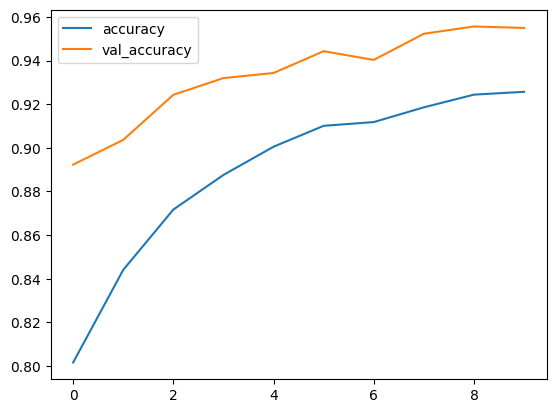

In [29]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

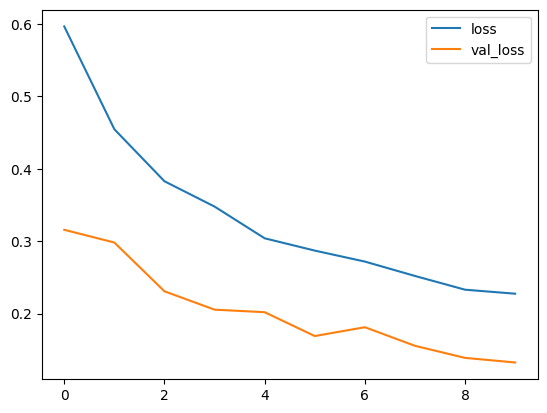

In [30]:
losses[['loss','val_loss']].plot()

In [31]:
from tensorflow.keras.preprocessing import image
y_pred = np.argmax(model.predict(test_image_gen), axis=-1)
print(y_pred)

188/188 [==============================] - 14s 72ms/step
[0 0 0 ... 9 6 9]


In [32]:
len(y_pred)

3000

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       300
           1       0.98      0.97      0.98       300
           2       0.91      0.95      0.93       300
           3       0.95      0.91      0.93       300
           4       0.97      0.98      0.98       300
           5       0.99      0.97      0.98       300
           6       0.91      0.95      0.93       300
           7       0.97      0.97      0.97       300
           8       0.98      0.99      0.99       300
           9       0.98      0.93      0.96       300

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



<Axes: >

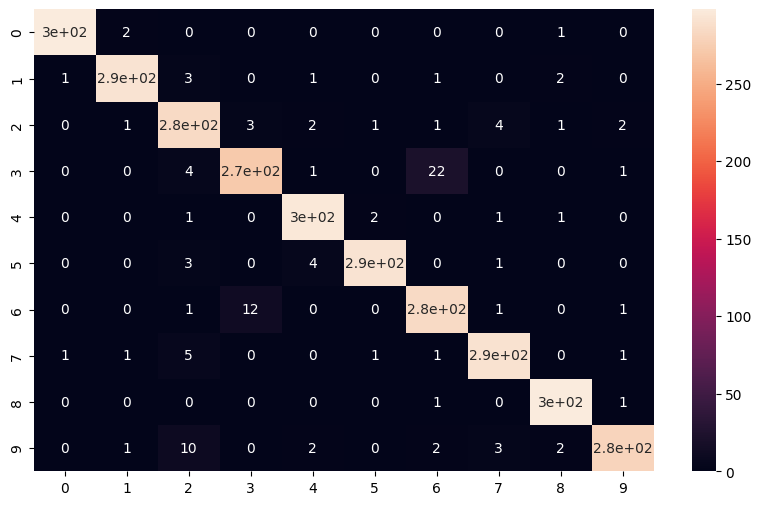

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_image_gen.classes,y_pred),annot=True)

#2. Use an another optimization algorithm and check your results.

In [35]:
from tensorflow.keras.optimizers import SGD

# Optimizer SGD
optimizer = SGD(lr=0.01, momentum=0.9)

# Compile the model with new optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Train the model
results_sgd = model.fit_generator(train_image_gen, epochs=10,
                                  validation_data=test_image_gen,
                                  callbacks=[early_stop])


Epoch 1/10


<ipython-input-35-4419862eaf77>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results_sgd = model.fit_generator(train_image_gen, epochs=10,


1063/1063 [==============================] - 107s 100ms/step - loss: 0.3395 - accuracy: 0.8904 - val_loss: 0.2347 - val_accuracy: 0.9307
Epoch 2/10
1063/1063 [==============================] - 106s 100ms/step - loss: 0.3063 - accuracy: 0.9045 - val_loss: 0.1786 - val_accuracy: 0.9453
Epoch 3/10
1063/1063 [==============================] - 100s 94ms/step - loss: 0.2822 - accuracy: 0.9074 - val_loss: 0.1662 - val_accuracy: 0.9517
Epoch 4/10
1063/1063 [==============================] - 106s 100ms/step - loss: 0.2742 - accuracy: 0.9119 - val_loss: 0.1657 - val_accuracy: 0.9497
Epoch 5/10
1063/1063 [==============================] - 96s 91ms/step - loss: 0.2577 - accuracy: 0.9181 - val_loss: 0.1882 - val_accuracy: 0.9407
Epoch 6/10
1063/1063 [==============================] - 105s 99ms/step - loss: 0.2641 - accuracy: 0.9138 - val_loss: 0.1547 - val_accuracy: 0.9513
Epoch 7/10
1063/1063 [==============================] - 98s 92ms/step - loss: 0.2464 - accuracy: 0.9207 - val_loss: 0.1427 - va